In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("loan.csv")
df.head()

,age,gender,marital_status,income,credit_score,loan_status
0,32,Male,Married,85000,720,Approved
1,45,Female,Single,62000,680,Approved
2,28,Male,Single,25000,590,Denied
3,51,Female,Married,105000,780,Approved
4,36,Male,Married,75000,710,Approved


In [3]:
df.isnull().sum()

age               0
gender            0
marital_status    0
income            0
credit_score      0
loan_status       0
dtype: int64

In [4]:
# handel categorical columns
Ohe=OneHotEncoder()
df["loan_status"]=Ohe.fit_transform(df[["loan_status"]]).toarray()
df["gender"]=Ohe.fit_transform(df[["gender"]]).toarray()
df["marital_status"]=Ohe.fit_transform(df[["marital_status"]]).toarray()
df.head()

,age,gender,marital_status,income,credit_score,loan_status
0,32,0.0,1.0,85000,720,1.0
1,45,1.0,0.0,62000,680,1.0
2,28,0.0,0.0,25000,590,0.0
3,51,1.0,1.0,105000,780,1.0
4,36,0.0,1.0,75000,710,1.0


In [5]:

# Extract Dependent and Independent variable
x=df.iloc[:,:-1]
y=df[["loan_status"]]

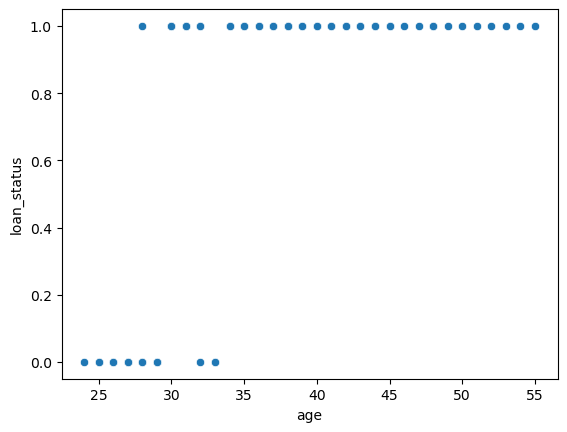

In [6]:
sns.scatterplot(data=df,x="age",y="loan_status")
plt.show()

In [7]:
# split data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [8]:
# train model
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
lr.predict(x_test)

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.])

In [10]:
lr.score(x_test,y_test)*100

92.3076923076923